Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

#### Load Data

In [2]:
df = pd.read_csv("dataset2.csv")
# Optional modifications to test
#df['Air temperature (deg C)'] = df['Air temperature (deg C)'] + 273.15
#df['Ball radius (mm)'] = 0

X = np.array(df.drop(labels='Target hit',axis=1))
y = np.array(df['Target hit'])

df.describe()

,Arm length (m),Ball weight (kg),Ball radius (mm),Air temperature (deg C),Spring constant (N per m),Device weight (kg),Target hit
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.302567,0.311477,51.959118,18.964250,619.341255,4.202961,0.500000
std,0.099262,0.098218,29.392652,4.874157,369.852469,2.160364,0.500063
min,0.050395,0.010604,10.272821,7.000000,67.411562,0.501552,0.000000
25%,0.235220,0.246335,32.664662,16.000000,361.441873,2.344290,0.000000
50%,0.302948,0.311282,44.108938,19.000000,528.829750,4.201250,0.500000
75%,0.367210,0.378485,63.282152,22.000000,769.896335,6.076208,1.000000
max,0.683179,0.669831,273.411328,30.000000,2953.444254,7.998456,1.000000


Standard Scale data

In [3]:
scaler = StandardScaler()
print(scaler.fit(X))


# save params
data1_mean = np.array(scaler.mean_)
data1_std = np.sqrt(np.array(scaler.var_))
scaling_data1 = np.array([data1_mean, data1_std])
np.savetxt('fce19-2.txt',scaling_data1)

# scale
X = scaler.fit_transform(X)

StandardScaler()


Split into train-test and reshape y

In [4]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

Plotting functions

In [5]:
def model_evolution_accuracy(history):
    plt.ylim(0,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def model_evolution_loss(history):  
    # summarize history for loss
    plt.ylim(0,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_test, y_train, y_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Test set evaluation:", model.evaluate(X_test,y_test))

 Design NN

Epoch 1/100
113/113 [==============================] - 6s 18ms/step - loss: 0.6925 - accuracy: 0.5461 - val_loss: 0.6865 - val_accuracy: 0.5900
Epoch 2/100
113/113 [==============================] - 2s 14ms/step - loss: 0.6842 - accuracy: 0.5736 - val_loss: 0.6798 - val_accuracy: 0.5950
Epoch 3/100
113/113 [==============================] - 1s 13ms/step - loss: 0.6754 - accuracy: 0.5864 - val_loss: 0.6724 - val_accuracy: 0.6200
Epoch 4/100
113/113 [==============================] - 1s 13ms/step - loss: 0.6676 - accuracy: 0.6053 - val_loss: 0.6618 - val_accuracy: 0.6100
Epoch 5/100
113/113 [==============================] - 1s 13ms/step - loss: 0.6598 - accuracy: 0.6108 - val_loss: 0.6703 - val_accuracy: 0.6150
Epoch 6/100
113/113 [==============================] - 1s 13ms/step - loss: 0.6527 - accuracy: 0.6164 - val_loss: 0.6544 - val_accuracy: 0.6125
Epoch 7/100
113/113 [==============================] - 1s 13ms/step - loss: 0.6473 - accuracy: 0.6294 - val_loss: 0.6482 - val_accuracy:

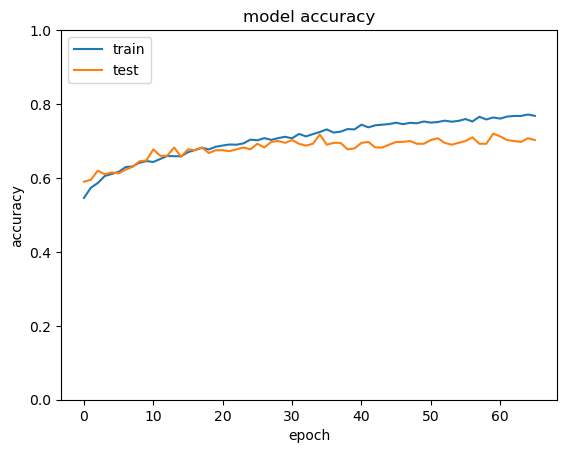

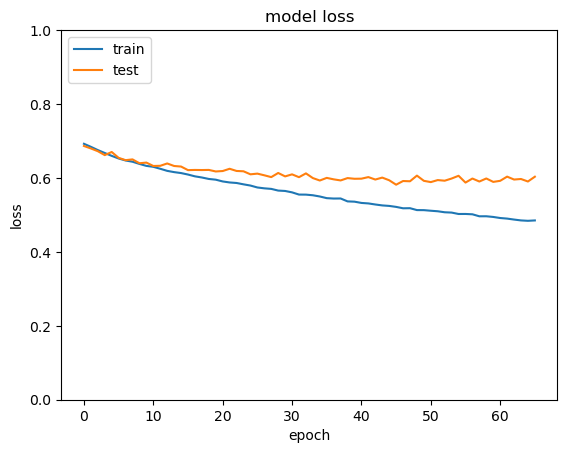

113/113 [==============================] - 1s 8ms/step - loss: 0.5109 - accuracy: 0.7531
Train set evaluation: [0.5108513832092285, 0.7530555725097656]
13/13 [==============================] - 0s 8ms/step - loss: 0.5818 - accuracy: 0.6975
Test set evaluation: [0.5817818641662598, 0.6974999904632568]


In [6]:
model = Sequential()

# hidden layers

model.add(Dense(units=20, activation='relu', input_dim=6))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))
#model.add(Dense(units=14,activation='relu'))



# final layer
model.add(Dense(units=2,activation='softmax'))

# Define custom optmizer?
#from keras.optimizers import SGD
#opt = SGD(learning_rate=0.1, momentum=0.9)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

# Train NN
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size = 32,validation_data=(X_test,y_test), verbose=1,callbacks=[early_stopping])
# Plot model evolution
model_evolution_accuracy(history)
model_evolution_loss(history)

# print metrics
test_set_evalution(model, X_train, X_test, y_train, y_test)

Compare to old model

In [7]:
model_old = keras.models.load_model('fce19-2.h5')

test_set_evalution(model_old, X_train, X_test, y_train, y_test)

113/113 [==============================] - 1s 9ms/step - loss: 0.3212 - accuracy: 0.8725
Train set evaluation: [0.3211888074874878, 0.8725000023841858]
13/13 [==============================] - 0s 8ms/step - loss: 0.3157 - accuracy: 0.8675
Test set evaluation: [0.3157211244106293, 0.8675000071525574]


In [8]:
current_loss = model_old.evaluate(X_test,y_test,verbose=0)[0]
current_loss

0.3157211244106293

In [9]:
model_old.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 8)                 56        
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 10)                90        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 2)                 22        
                                                                 
Total params: 350
Trainable params: 350
Non-trainable params: 0
_________________________________________________________________


Save model

In [10]:
#model.save('fce19-2.h5')

## Iteration to find best Params for a 2 Layer Model

In [ ]:
layer1_nodes = [8,10,12]
layer2_nodes = [8,10,12]
layer3_nodes = [8,10,12]
layer4_nodes = [8,10,12]
es = 20

In [ ]:
layer1_nodes = [6,8,10,12,14,16,18,20]
layer2_nodes = [6,8,10,12,14,16,18,20]
layer3_nodes = [6,8,10,12,14,16,18,20]
min_loss = 0.5
current_loss = 1
# iterate through alyer 1 nodes first
for l1 in layer1_nodes:
    for l2 in layer2_nodes:
        for l3 in layer3_nodes:
                #print('L1:{}, L2:{}, L3:{},L4:{}, Es:{}, \n'.format(l1, l2,l3,l4, es))

                model = Sequential()
                model.add(Dense(units=l1, activation='relu', input_dim=6))
                model.add(Dense(units=l2,activation='relu'))
                model.add(Dense(units=l3,activation='relu'))
                model.add(Dense(units=2,activation='softmax'))
                model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
                early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=es, restore_best_weights=True)
                history = model.fit(X_train, y_train, epochs=1000, batch_size = 62,validation_data=(X_test,y_test), verbose=0,callbacks=[early_stopping])
                
                current_loss = model.evaluate(X_test,y_test,verbose=0)[0]
                
                if current_loss < min_loss:  
                    print('L1:{}, L2:{}, L3:{}, Es:{}, \n'.format(l1, l2,l3, es))
                    min_loss = current_loss   
                    # Plot model evolution
                    model_evolution_accuracy(history)
                    model_evolution_loss(history)
                    # print metrics
                    test_set_evalution(model, X_train, X_test, y_train, y_test)

                print('Test ended \n ----------------- \n')